<a href="https://colab.research.google.com/github/Franklinyeruan/CHEM101.6-1/blob/main/NTailXD_Autoencode(RAW)_Alpha_Carbon_informative.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Set-up (Run Once) 

In [ ]:
# Nglview (Must install these first)
!pip install -q nglview pytraj
from google.colab import output
output.enable_custom_widget_manager()

# install dependencies 
!pip -q install py3Dmol 2>&1 1>/dev/null
!pip install --upgrade MDAnalysis 2>&1 1>/dev/null
!pip install biopandas 2>&1 1>/dev/null

# Openmm
import sys
print(sys.version)
!wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.10.3-Linux-x86_64.sh
!bash Miniconda3-py*.sh -bfp /usr/local
!conda config --set always_yes yes
!conda config --add channels conda-forge
!conda create -n openmm python=3.7 cudatoolkit=10.0 git jupyterlab numpy pandas scipy matplotlib ipympl rdkit openbabel openmm mdtraj pymbar pdbfixer parmed openff-toolkit openmoltools openmmforcefields
sys.path.append('/usr/local/envs/openmm/lib/python3.7/site-packages')
import openmm.testInstallation
openmm.testInstallation.main()

# mdtraj 
!conda install -c conda-forge mdtraj 

# Clear output 
from IPython.display import clear_output
clear_output()

In [ ]:
import mdtraj as md
import nglview as ngl
import openmm as mm
from openmm import *
from openmm.app import *
from openmm.unit import *

In [ ]:
import os
import urllib.request  
import numpy as np
#import mdanalysis as mda
import py3Dmol
#from __future__ import print_function
import pytraj as pt
import platform
#import scipy.cluster.hierarchy
from scipy.spatial.distance import squareform
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import griddata
import seaborn as sb
from statistics import mean, stdev
from pytraj import matrix
from matplotlib import colors
from IPython.display import set_matplotlib_formats

# Set-up TPU


In [ ]:
# Packages
import pandas as pd
#import matplotlib.pyplot as plt
import numpy as np
#import random
#import pyreadstat
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight

from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.layers.embeddings import Embedding
from keras.metrics import AUC

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.layers import Attention
from keras.layers import MultiHeadAttention
#from keras_self_attention import SeqSelfAttention

In [ ]:
# TPU Configuration
resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='')
tf.config.experimental_connect_to_cluster(resolver)
# This is the TPU initialization code that has to be at the beginning.
tf.tpu.experimental.initialize_tpu_system(resolver)
print("All devices: ", tf.config.list_logical_devices('TPU'))

All devices:  [LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:0', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:1', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:2', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:3', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:4', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:5', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:6', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:7', device_type='TPU')]


In [ ]:
a = tf.constant([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
b = tf.constant([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])

with tf.device('/TPU:0'):
  c = tf.matmul(a, b)

print("c device: ", c.device)
print(c)
strategy = tf.distribute.TPUStrategy(resolver)


@tf.function
def matmul_fn(x, y):
  z = tf.matmul(x, y)
  return z

z = strategy.run(matmul_fn, args=(a, b))
print(z)

c device:  /job:worker/replica:0/task:0/device:TPU:0
tf.Tensor(
[[22. 28.]
 [49. 64.]], shape=(2, 2), dtype=float32)
PerReplica:{
  0: tf.Tensor(
[[22. 28.]
 [49. 64.]], shape=(2, 2), dtype=float32),
  1: tf.Tensor(
[[22. 28.]
 [49. 64.]], shape=(2, 2), dtype=float32),
  2: tf.Tensor(
[[22. 28.]
 [49. 64.]], shape=(2, 2), dtype=float32),
  3: tf.Tensor(
[[22. 28.]
 [49. 64.]], shape=(2, 2), dtype=float32),
  4: tf.Tensor(
[[22. 28.]
 [49. 64.]], shape=(2, 2), dtype=float32),
  5: tf.Tensor(
[[22. 28.]
 [49. 64.]], shape=(2, 2), dtype=float32),
  6: tf.Tensor(
[[22. 28.]
 [49. 64.]], shape=(2, 2), dtype=float32),
  7: tf.Tensor(
[[22. 28.]
 [49. 64.]], shape=(2, 2), dtype=float32)
}


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Start Here

In [ ]:
# Load trajectory
dcd = "/content/drive/MyDrive/School /CHEM 80: Independent Study/NTXD.DCD.PDB/traj_trunc.dcd"
pdb = "/content/drive/MyDrive/School /CHEM 80: Independent Study/NTXD.DCD.PDB/Ntail.XD.protein.pdb"

# The command reads all atomic positions and keep tracks of atom connectivity (topology)
stride = 100
traj = md.load(dcd,  top=pdb, stride = stride)[0:150000]
atom_to_keep = [a.index for a in traj.topology.atoms if a.name == 'CA']
traj.restrict_atoms(atom_to_keep)  # this acts inplace on the trajectory
#traj.center_coordinates()
traj

<mdtraj.Trajectory with 8318 frames, 70 atoms, 70 residues, and unitcells at 0x7f191d62cc90>

# Trying something new here

In [ ]:
# center coordinates so that movements are relative 
traj = traj.center_coordinates()

Below is what a surface looks like in 3d 

In [ ]:
# Normalization Function
def normalize(min, max, point):
  return (point-min)/(max-min)

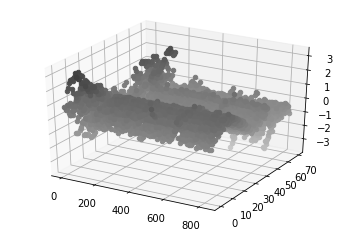

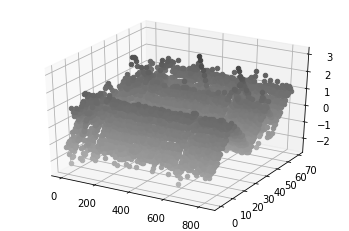

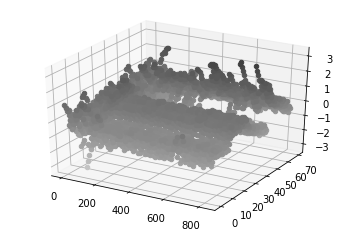

In [ ]:
#3-d plot of X, Y, Z for each frame and each atom. We will be using this type of raw data and using Convolutional Neural.. 
# ...Networks to autoencode everything 

time = 832
atom = 70

def showX():
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
   
    for i in range(0, time, 10):
      for j in range(0, atom):
        z =  traj.xyz[i,j,0]
        color = normalize(traj.xyz.min(), traj.xyz.max(), z)

        ax.scatter(i, j, z, c=str(1-color)) #, c= traj.xyz[i,j,0], cmap='viridis')
    plt.show
    plt.clf

def showY():
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
   
    for i in range(0, time, 10):
      for j in range(0, atom):
        z =  traj.xyz[i,j,1]
        color = normalize(traj.xyz.min(), traj.xyz.max(), z)

        ax.scatter(i, j, z, c=str(1-color)) #, c= traj.xyz[i,j,0], cmap='viridis')
    plt.show
    plt.clf


def showZ():
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
   
    for i in range(0, time, 10):
      for j in range(0, atom):
        z =  traj.xyz[i,j,2]
        color = normalize(traj.xyz.min(), traj.xyz.max(), z)

        ax.scatter(i, j, z, c=str(1-color)) #, c= traj.xyz[i,j,0], cmap='viridis')
    plt.show
    plt.clf

showX()
showY()
showZ()


Now we're going to autoencode the raw xyz coordinates and then try to recreate it. It is quite a large file to work with

In [ ]:
# Importing 
import pandas as pd
import tensorflow as tf
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model

In [ ]:
time, atom, coord = traj.xyz.shape

Modeling

In [ ]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Reshape
from keras.models import Model
from keras import backend as K


atom = 70
input_img = Input(shape=(atom, coord, 1))  # adapt this if using `channels_first` image data format
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 3), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((1, 1), padding='same')(x)
x = Flatten()(x)
x = Dense(1120)(x)
encoded = Dense(2)(x)


# begin building up
x = Dense(2)(encoded) 
x = Dense(1120)(x)
x = Reshape((35, 1, 32))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((1, 1))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 3))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)
# this model maps an input to its reconstruction

autoencoder = Model(input_img, decoded)
autoencoder.summary()
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 70, 3, 1)]        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 70, 3, 32)         320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 1, 32)        0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 35, 1, 32)         9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 35, 1, 32)        0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1120)              0   

In [ ]:
x = traj.xyz
x = x.reshape((8318, 70, 3, 1)) #only encoding 1 matrix? 

x.shape

(8318, 70, 3, 1)

In [ ]:
import time
start = time.process_time()

# Compile Model 
with strategy.scope():
  autoencoder = Model(input_img, decoded)
  autoencoder.summary()
  autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())



autoencoder.fit(x, x,
                epochs=10,
                shuffle=True)

Epoch 1/10
260/260 [==============================] - 32s 119ms/step - loss: 0.3874
Epoch 2/10
260/260 [==============================] - 30s 115ms/step - loss: 0.3315
Epoch 3/10
260/260 [==============================] - 29s 113ms/step - loss: 0.3216
Epoch 4/10
260/260 [==============================] - 30s 116ms/step - loss: 0.3184
Epoch 5/10
260/260 [==============================] - 31s 121ms/step - loss: 0.3163
Epoch 6/10
260/260 [==============================] - 30s 116ms/step - loss: 0.3058
Epoch 7/10
260/260 [==============================] - 30s 116ms/step - loss: 0.2908
Epoch 8/10
260/260 [==============================] - 31s 121ms/step - loss: 0.2896
Epoch 9/10
260/260 [==============================] - 29s 112ms/step - loss: 0.2884
Epoch 10/10
260/260 [==============================] - 27s 103ms/step - loss: 0.2875


In [ ]:
# Extract latent layer 
from tensorflow.keras import backend as K
layerIndex = 8
func = K.function([autoencoder.get_layer(index=0).input], autoencoder.get_layer(index=layerIndex).output)
layerOutput = func(x)  # input_data is a numpy array
print(layerOutput)


[[-25.842518  -40.232216 ]
 [-30.543741  -51.47857  ]
 [-27.696785   -3.7513995]
 ...
 [-46.36555   -55.605816 ]
 [-42.862064  -35.36748  ]
 [-36.06712   -49.955593 ]]


In [ ]:
layerOutput.size

16636

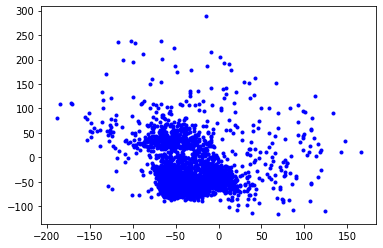

In [ ]:
#2d latent space 
def normalize(min, max, point):
  return (point-min)/(max-min)

# lower means lower rmsd
start = 0
end = 8318
for i in range(start, end):
    plt.scatter(layerOutput[i][0],layerOutput[i][1], marker = '.', c = 'blue')

